In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from typing import List
from mcp import WrapperOOBBinaryConformalClassifier
from plotly_utils import efficiency_curve, reliability_curve, histogram, confusion_matrix

In [2]:
# Gerar um conjunto de dados de classificação
X, y = make_classification(n_samples=100000, n_features=40, random_state=42)

In [3]:
# Dividir os dados em conjuntos de treinamento, calibração e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)
clf = WrapperOOBBinaryConformalClassifier(rf)
clf.fit(y_train)

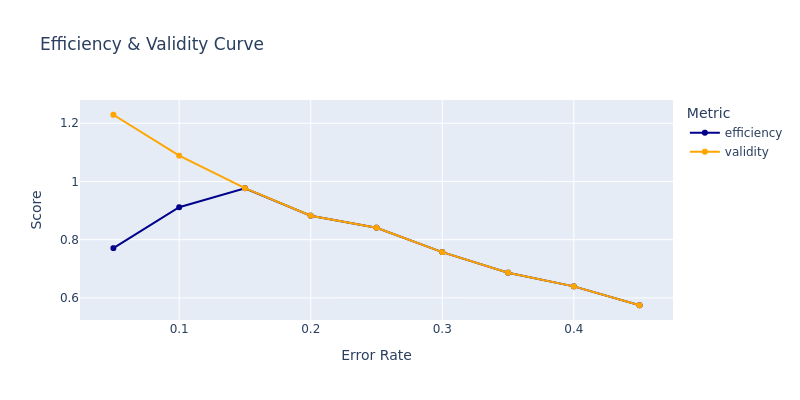

In [5]:
efficiency_curve(clf, X_test, "png")

In [6]:
clf.calibrate_alpha(X_calib)
clf.alpha

0.1

Random Forest

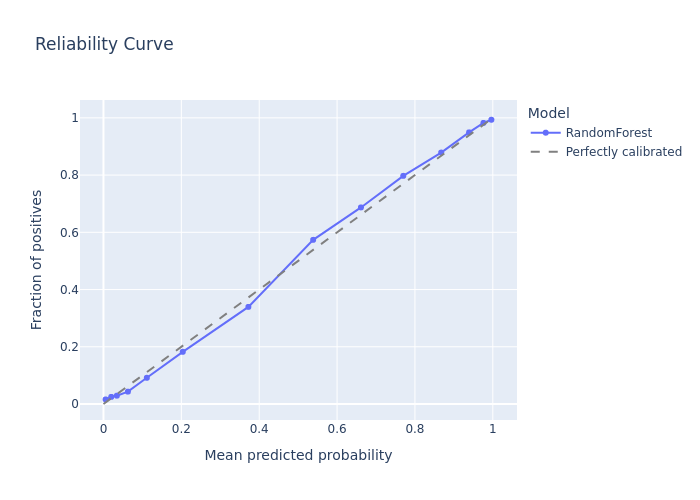

In [7]:
reliability_curve(clf.learner, X_test, y_test, 15,  "png")

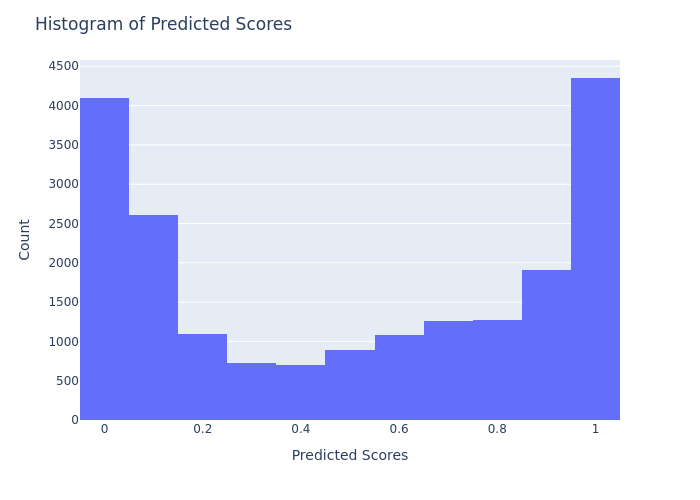

In [8]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

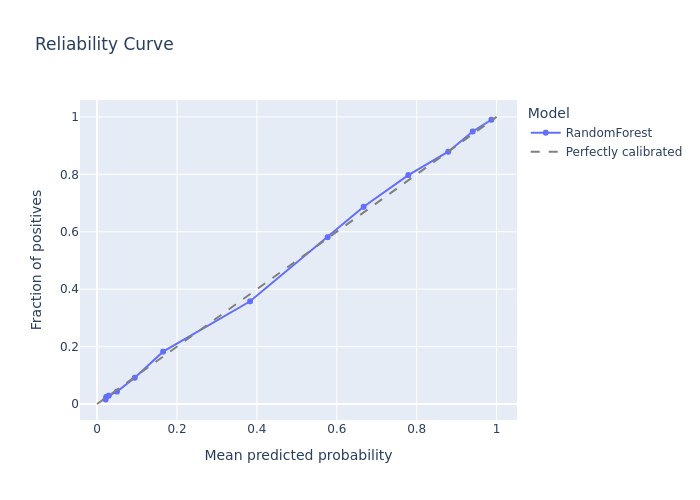

In [9]:
reliability_curve(clf, X_test, y_test, 15, "png")

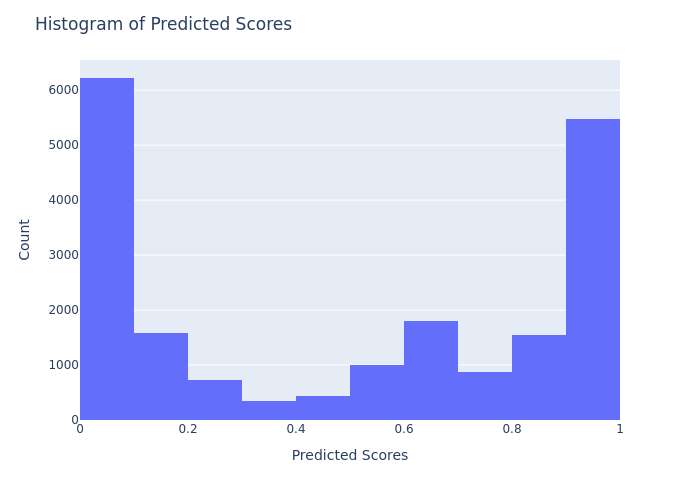

In [10]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [11]:
clf.evaluate(X_test, y_test, alpha=0.05)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,auc,precision,recall,alpha
0,0.771,1.229,0.0,0.047,0.298,0.091,0.006,0.979,0.945,0.905,0.806,0.05


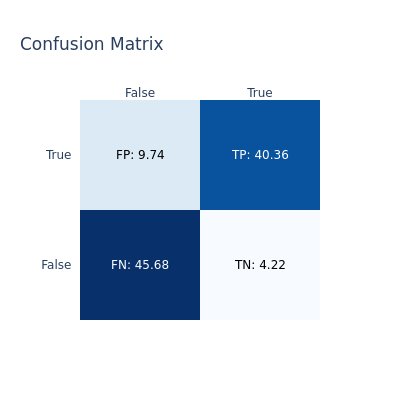

In [19]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [15]:
clf.evaluate(X_test, y_test, alpha=0.10)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,auc,precision,recall,alpha
0,0.911,1.089,0.0,0.088,0.298,0.091,0.006,0.955,0.945,0.905,0.806,0.1


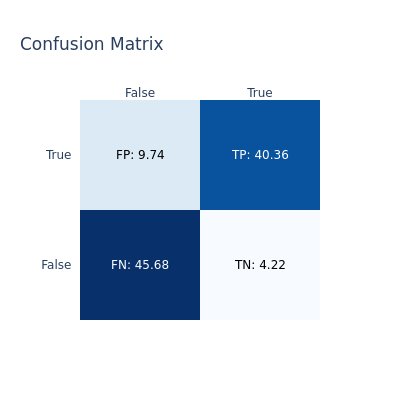

In [18]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")